# Linear Regression: Normal Equation vs Gradient Descent


## 1. Linear Regression 개요
- **목적**: 주어진 입력 변수 $X$와 출력 변수 $y$ 사이의 선형 관계를 모델링하여, 새로운 입력에 대한 예측값 $\hat{y}$를 생성.
- **모델 식**:
  
  $\hat{y} = Xw + b$
  
  여기서,
  - $X$: 입력 데이터 행렬 ($m \times n$)
  - $w$: 가중치 벡터 ($n \times 1$)
  - $b$: 절편 (bias term)

## 2. 손실 함수 (Loss Function)
- 평균 제곱 오차(Mean Squared Error, MSE)를 최소화하는 것이 목표:
  
  $L(w, b) = \frac{1}{m} \sum_{i=1}^{m} (y_i - (X_i w + b))^2$


## 3. Linear Regression을 푸는 두 가지 방법

### 3.1 Normal Equation (정규 방정식)
- **아이디어**: 손실 함수 $L(w, b)$의 최솟값을 구하기 위해 편미분을 0으로 놓고 해를 직접 구한다.
- **정리된 식**:
  $w = (X^TX)^{-1}X^Ty$
- **특징**:
  - 해를 직접 계산한다 (Closed-form solution)
  - 역행렬 계산이 필요하다 → 계산 비용이 $O(n^3)$
  - 데이터셋이 작을 때 빠르고 효율적
  - $X^TX$가 singular (역행렬이 존재하지 않을 경우) 문제가 생길 수 있다.

- **장단점**:
  - ✔️ 데이터가 작으면 빠르고 정확함
  - ❌ 데이터가 크거나 feature 수가 많으면 계산량이 폭발함


### 3.2 Gradient Descent (경사하강법)
- **아이디어**: 초기값에서 시작하여, 손실 함수의 기울기(gradient)를 따라 조금씩 이동하면서 최솟값을 찾아간다.

- **업데이트 식** (Batch Gradient Descent):
  - $w := w - \alpha \frac{1}{m} X^T(Xw + b - y)$
  - $b := b - \alpha \frac{1}{m} \sum_{i=1}^{m} (X_i w + b - y_i)$
  - 여기서 $\alpha$는 학습률(learning rate).

- **특징**:
  - 점진적으로 해에 수렴하는 수치적 방법
  - 대규모 데이터셋에도 적용 가능
  - 수렴 속도는 학습률, 데이터 스케일링 등에 크게 의존

- **장단점**:
  - ✔️ 큰 데이터셋에도 적용 가능
  - ❌ 학습률, 초기값에 따라 수렴이 느리거나 실패할 수 있음
  - ❌ 적절한 하이퍼파라미터(learning rate 등) 튜닝이 필요

## 4. 요약
| 방법 | 장점 | 단점 |
|:---|:---|:---|
| Normal Equation | 빠른 직접 계산 (소규모 데이터에 적합) | 큰 데이터셋에서는 계산량이 큼 |
| Gradient Descent | 대규모 데이터에도 확장 가능 | 수렴 속도, 튜닝에 민감함 |


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from linear_regression_normal_equation import LinearRegressionNormalEquation
from linear_regression_gradient_descent import LinearRegressionGradientDescent

In [2]:
# Generate some sample data
X, y = make_regression(n_samples=1000, n_features=1, noise=10, random_state=42)

In [ ]:
class LinearRegressionNormalEquation:
    def __init__(self):

        '''
        initialize model parameters and scalers
        args:
            None
        '''
        self.theta = None
        self.scaler_X = StandardScaler()


    def fit(self, X, y):
        # Fit the model using normal equation method

        # Scale the input feature
        X_scaled = self.scaler_X.fit_transform(X)

        # Add a column of ones to X for the intercept term



In [20]:
# Create and fit the Normal Equation model
ne_model = LinearRegressionNormalEquation()
ne_model.fit(X, y)

# Create and fit the Gradient Descent model
gd_model = LinearRegressionGradientDescent(learning_rate=0.01, n_iterations=1000)
gd_model.fit(X, y)

In [21]:
# Print the final parameters
ne_slope, ne_intercept = ne_model.get_params()
gd_slope, gd_intercept = gd_model.get_params()

print("\nNormal Equation results:")
print(f"Slope: {ne_slope[0]:.4f}")
print(f"Intercept: {ne_intercept:.4f}")

print("Gradient Descent results:")
print(f"Slope: {gd_slope[0]:.4f}")
print(f"Intercept: {gd_intercept:.4f}")


Normal Equation results:
Slope: 16.6335
Intercept: 0.0453
Gradient Descent results:
Slope: 16.6335
Intercept: 0.0453


In [22]:
# Calculate and print Mean Squared Error (MSE) for both models
y_pred_ne = ne_model.predict(X)
y_pred_gd = gd_model.predict(X)

mse_ne = np.mean((y - y_pred_ne) ** 2)
mse_gd = np.mean((y - y_pred_gd) ** 2)


print(f"MSE (Normal Equation): {mse_ne:.4f}")
print(f"MSE (Gradient Descent): {mse_gd:.4f}")

MSE (Normal Equation): 98.0181
MSE (Gradient Descent): 98.0181


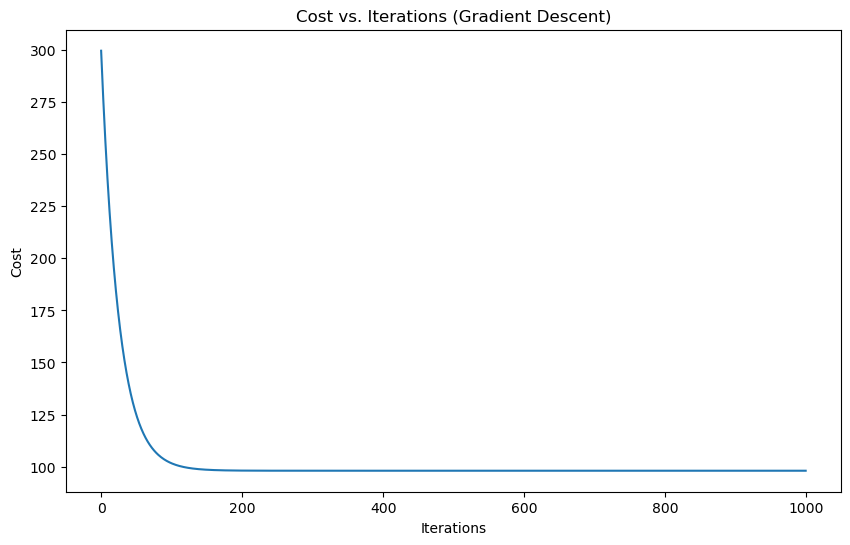

In [23]:
# Plot the cost history for Gradient Descent
plt.figure(figsize=(10, 6))
plt.plot(range(len(gd_model.cost_history)), gd_model.cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs. Iterations (Gradient Descent)")
plt.show()

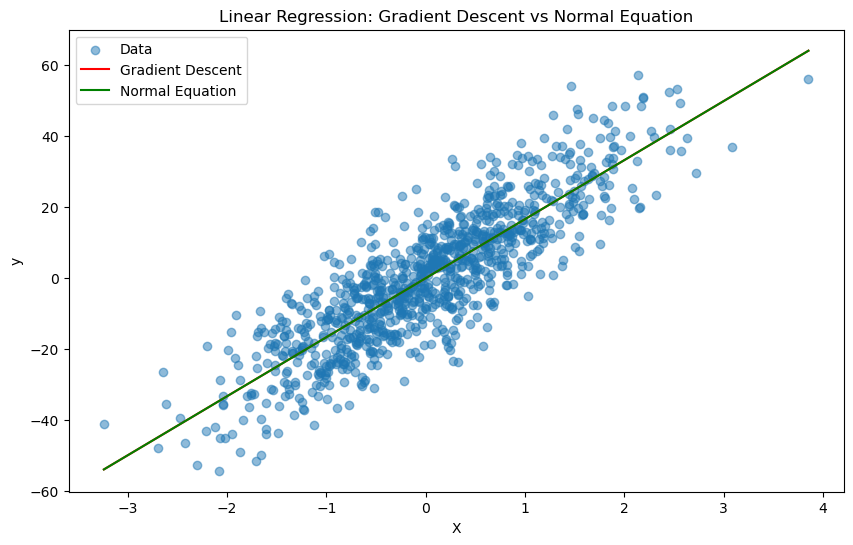

In [24]:
# Plot the data and the fitted lines
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label="Data")
X_test = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred_gd = gd_model.predict(X_test)
y_pred_ne = ne_model.predict(X_test)
plt.plot(X_test, y_pred_gd, color="r", label="Gradient Descent")
plt.plot(X_test, y_pred_ne, color="g", label="Normal Equation")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression: Gradient Descent vs Normal Equation")
plt.legend()
plt.show()

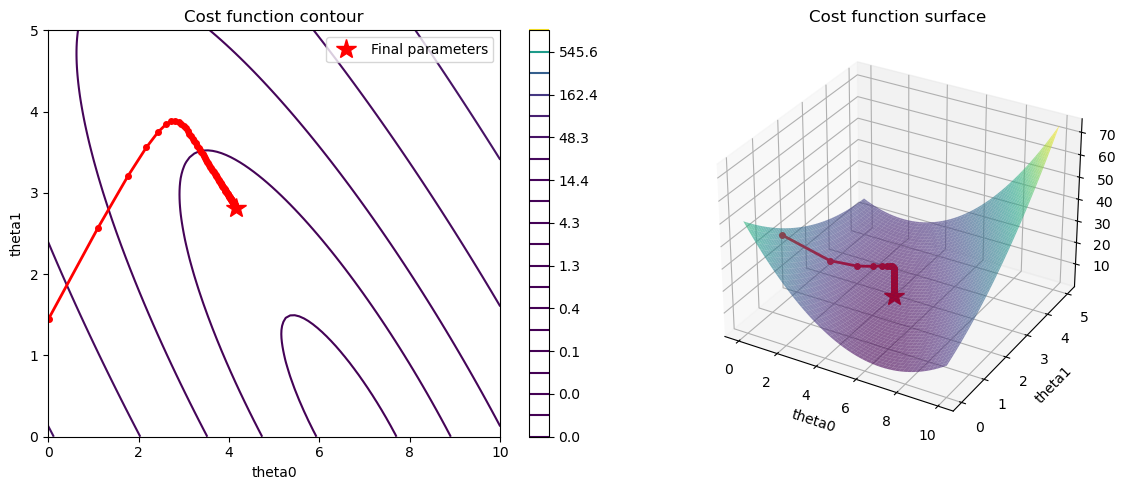

Final parameters: theta0 = 4.1610, theta1 = 2.8178
Final cost: 0.8075


In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)


# Gradient Descent function
def gradient_descent(X, y, learning_rate=0.1, n_iterations=100):
    m = len(y)
    X_b = np.c_[np.ones((m, 1)), X]
    theta = np.random.randn(2, 1)

    theta_history = []
    cost_history = []

    for _ in range(n_iterations):
        theta_history.append(theta.copy())

        predictions = X_b.dot(theta)
        cost = np.mean((predictions - y) ** 2)
        cost_history.append(cost)

        gradients = 2 / m * X_b.T.dot(predictions - y)
        theta = theta - learning_rate * gradients

    return theta, np.array(theta_history), np.array(cost_history)


# Run gradient descent
theta_final, theta_history, cost_history = gradient_descent(X, y)

# Create a mesh grid for the parameter space
theta0_range = np.linspace(0, 10, 100)
theta1_range = np.linspace(0, 5, 100)
theta0, theta1 = np.meshgrid(theta0_range, theta1_range)

# Compute the cost for each point in the parameter space
J = np.zeros(theta0.shape)
for i in range(theta0.shape[0]):
    for j in range(theta0.shape[1]):
        theta = np.array([[theta0[i, j]], [theta1[i, j]]])
        J[i, j] = np.mean((X.dot(theta[1]) + theta[0] - y) ** 2)

# Plot the cost function contour and gradient descent path
plt.figure(figsize=(12, 5))

# Contour plot
plt.subplot(121)
plt.contour(theta0, theta1, J, levels=np.logspace(-2, 3, 20))
plt.colorbar()
plt.xlabel("theta0")
plt.ylabel("theta1")
plt.title("Cost function contour")

# Plot gradient descent path
path = theta_history.reshape(-1, 2)
plt.plot(path[:, 0], path[:, 1], "r-o", linewidth=2, markersize=4)
plt.plot(theta_final[0], theta_final[1], "r*", markersize=15, label="Final parameters")
plt.legend()

# 3D surface plot
ax = plt.subplot(122, projection="3d")
ax.plot_surface(theta0, theta1, J, cmap="viridis", alpha=0.6)
ax.set_xlabel("theta0")
ax.set_ylabel("theta1")
ax.set_zlabel("Cost J")
ax.set_title("Cost function surface")

# Plot gradient descent path on the surface
ax.plot(path[:, 0], path[:, 1], cost_history, "r-o", linewidth=2, markersize=4)
ax.plot([theta_final[0]], [theta_final[1]], [cost_history[-1]], "r*", markersize=15)

plt.tight_layout()
plt.show()

print(
    f"Final parameters: theta0 = {theta_final[0, 0]:.4f}, theta1 = {theta_final[1, 0]:.4f}"
)
print(f"Final cost: {cost_history[-1]:.4f}")